# 1.) Import the Credit Card Fraud Data From CCLE

In [45]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/#3/fraudTest.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# 2.) Select four columns to use as features (one just be trans_date_trans)

In [7]:
df_features = df[["trans_date_trans_time", "category","amt", "city_pop", "is_fraud"]]

# 3.) Create a unique variable out of trans_date.

In [8]:
df_features.dtypes

trans_date_trans_time     object
category                  object
amt                      float64
city_pop                   int64
is_fraud                   int64
dtype: object

In [9]:
df_features["trans_date_trans_time"] = pd.to_datetime(df_features["trans_date_trans_time"])

<ipython-input-9-9be0c2ff7e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["trans_date_trans_time"] = pd.to_datetime(df_features["trans_date_trans_time"])


In [10]:
df_features.dtypes

trans_date_trans_time    datetime64[ns]
category                         object
amt                             float64
city_pop                          int64
is_fraud                          int64
dtype: object

In [11]:
from datetime import datetime, timedelta

# Create a function to extract the hour and create the dummy variable
def create_dummy(x):
    # Create a time range
    start_time = datetime.strptime("00:00:00", "%X").time()
    end_time = datetime.strptime("05:00:00", "%X").time()

    # Check if the time is between midnight and 5am
    if start_time <= x.time() < end_time:
        return 1
    else:
        return 0

# Create a new column with the dummy variable
df_features['dummy'] = df_features["trans_date_trans_time"].apply(create_dummy)

print(df_features)

# optimized code in one line: (for my reference only)
#df['dummy'] = ((pd.DatetimeIndex(df['datetime']).hour >= 0) & (pd.DatetimeIndex(df['datetime']).hour < 5)).astype(int)

       trans_date_trans_time        category     amt  city_pop  is_fraud  \
0        2020-06-21 12:14:25   personal_care    2.86    333497         0   
1        2020-06-21 12:14:33   personal_care   29.84       302         0   
2        2020-06-21 12:14:53  health_fitness   41.28     34496         0   
3        2020-06-21 12:15:15        misc_pos   60.05     54767         0   
4        2020-06-21 12:15:17          travel    3.19      1126         0   
...                      ...             ...     ...       ...       ...   
555714   2020-12-31 23:59:07  health_fitness   43.77       519         0   
555715   2020-12-31 23:59:09       kids_pets  111.84     28739         0   
555716   2020-12-31 23:59:15       kids_pets   86.88      3684         0   
555717   2020-12-31 23:59:24          travel    7.99       129         0   
555718   2020-12-31 23:59:34   entertainment   38.13    116001         0   

        dummy  
0           0  
1           0  
2           0  
3           0  
4      

<ipython-input-11-4a1eeed60cb9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['dummy'] = df_features["trans_date_trans_time"].apply(create_dummy)


In [12]:
df_features['dummy'].unique()

array([0, 1])

In [13]:
df_features['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [14]:
X = pd.get_dummies(df_features, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [15]:
X.head()

,amt,city_pop,dummy,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 5.) Train a Logistic regression.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pylab as pl

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
log_reg = LogisticRegression().fit(X_train, y_train)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

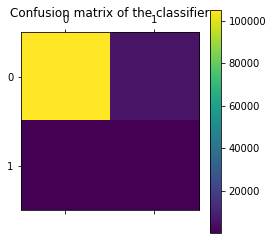

FPR: 0.050353149442728375
Threshold: 0.005940867848388552


In [33]:
# Option 1 using chatgpt and automatic tuning
from sklearn.metrics import roc_curve

# Predict probabilities for the test set
y_probs = log_reg.predict_proba(X_test)

# Get false positive rate and true positive rate for different thresho
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

# Find the threshold that corresponds to a FPR of 5%
threshold_index = np.abs(fpr - 0.05).argmin()
threshold = thresholds[threshold_index]

# Use the threshold to make binary predictions
y_preds = (y_probs[:, 1] > threshold).astype(int)

# Calculate the confusion matrix to check the false positive rate
conf_matrix = confusion_matrix(y_test, y_preds)

pl.matshow(conf_matrix)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

conf_matrix[0,0]

TN = conf_matrix[0,0]
FP = conf_matrix[0,1]

fpr = (FP/(FP + TN))
print("FPR:", fpr)
print("Threshold:", threshold)

In [40]:
# OPTION 2: TRYING EMPIRICALLY TO FIND THE RIGHT THRESHOLD

# Get the predicted probabilities of the test set
y_probs2 = log_reg.predict_proba(X_test)[:, 1]

# Set the threshold to target a FPR of 5% / WE'RE LOOKING FOR
# .05*111,000 = 5500 FP in top right corner of CM
threshold2 = 0.006

# Get the predicted labels based on the threshold
y_preds2 = y_probs2 > threshold2

# Get the confusion matrix
confusion_matrix(y_test, y_preds2)


array([[105508,   5210],
       [   171,    255]])

I manually tried several values of the threshold so that around .05*111,000 = 5,500 FP appeared in top right corner of the confusion matrix. I obtained a threshold of 0.6%, for a FPR of 5.2/110= 4.7% - this number is close to the one found using ChatGPT.

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [41]:
# from Sam's code
df_temp = df_features.copy()

df_temp['pred'] = log_reg.predict(X)
df_temp = df_temp[['pred', 'is_fraud', 'amt']]

df_temp

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19
...,...,...,...
555714,0,0,43.77
555715,0,0,111.84
555716,0,0,86.88
555717,0,0,7.99


In [42]:
# slicing through the df to find TN, TP, FP, FN:
TN = df_temp.loc[(df_temp['pred'] == 0) & (df_temp['is_fraud'] == 0)]
FP = df_temp.loc[(df_temp['pred'] == 1) & (df_temp['is_fraud'] == 0)]
TP = df_temp.loc[(df_temp['pred'] == 1) & (df_temp['is_fraud'] == 1)]
FN = df_temp.loc[(df_temp['pred'] == 0) & (df_temp['is_fraud'] == 1)]

For every false transaction (True Negatives and False Negatives) the company will lose the "amt" of the transaction, and for every true transaction (True Positive and False Positive), the company will gain ".02*amt" of the transaction.

Using this model, the company experiences a financial loss of around $10,000.



# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

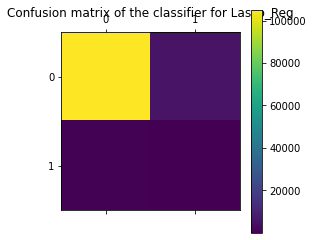

FPR with Lasso_Reg: 0.050027999060676676
Threshold usign Lasso_reg: 0.4823713649667646


In [46]:
lasso_reg = LogisticRegression(penalty = 'l1', solver = 'saga')
lasso_reg.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = lasso_reg.predict_proba(X_test)

# Get FPR and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

# Find the threshold that corresponds to a FPR of 5%
threshold_index = np.abs(fpr - 0.05).argmin()
threshold = thresholds[threshold_index]

# Use the threshold to make binary predictions
y_preds = (y_probs[:, 1] > threshold).astype(int)

# Calculate the confusion matrix to check the fale positive rate
cm_lasso = confusion_matrix(y_test, y_preds)

pl.matshow(cm_lasso)
pl.title('Confusion matrix of the classifier for Lasso_Reg')
pl.colorbar()
pl.show()

cm_lasso[0,0]

TN_l = cm_lasso[0,0]
FP_l = cm_lasso[0,1]

fpr_l = (FP_l/(FP_l + TN_l))
print("FPR with Lasso_Reg:", fpr_l)
print("Threshold usign Lasso_reg:", threshold)

Lasso is a regularization technique that can be sued to select featrues by shrinking the coefficients of less important features to zero. We observe a significantly higher threshold when running the lasso regression (in comparison to the logistic regression) - which means that there is a lot of TP and few TN which means the model is not accurate. I would not use the selected features in a trusted prediction model. It is however important to consider the interpratability of the selected features when choosing them to build trustworthy prediction models.